In [2]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
#data = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15.csv')
data = pd.read_csv('datasets/UNSW_NB15.csv')

In [4]:
data.head(n=5)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [5]:
data.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [6]:
data[data['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [7]:
data['service'].replace('-',np.nan,inplace=True)

C:\Users\saran\AppData\Local\Temp\ipykernel_14816\1851727398.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['service'].replace('-',np.nan,inplace=True)


In [8]:
data.isnull().sum()

id                       0
dur                      0
proto                    0
service              94168
state                    0
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

In [9]:
data.shape


(175341, 45)

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(81173, 45)

In [12]:
data['attack_cat'].value_counts()

attack_cat
Generic           39496
Normal            19488
Exploits          16187
DoS                1791
Fuzzers            1731
Reconnaissance     1703
Analysis            564
Worms               114
Backdoor             99
Name: count, dtype: int64

In [13]:
data['state'].value_counts()

state
INT    39580
FIN    33640
CON     7711
REQ      228
RST       14
Name: count, dtype: int64

In [14]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [15]:
#features = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15_features.csv')
features = pd.read_csv('datasets/UNSW_NB15_features.csv')

In [16]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [17]:
features['Type '] = features['Type '].str.lower()

In [18]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [19]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [20]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(data[c])

In [21]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(data[c])

In [22]:
# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(data[c])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81173 entries, 3 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 81173 non-null  int64  
 1   dur                81173 non-null  float64
 2   proto              81173 non-null  object 
 3   service            81173 non-null  object 
 4   state              81173 non-null  object 
 5   spkts              81173 non-null  int64  
 6   dpkts              81173 non-null  int64  
 7   sbytes             81173 non-null  int64  
 8   dbytes             81173 non-null  int64  
 9   rate               81173 non-null  float64
 10  sttl               81173 non-null  int64  
 11  dttl               81173 non-null  int64  
 12  sload              81173 non-null  float64
 13  dload              81173 non-null  float64
 14  sloss              81173 non-null  int64  
 15  dloss              81173 non-null  int64  
 16  sinpkt             81173 n

In [24]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


EDA

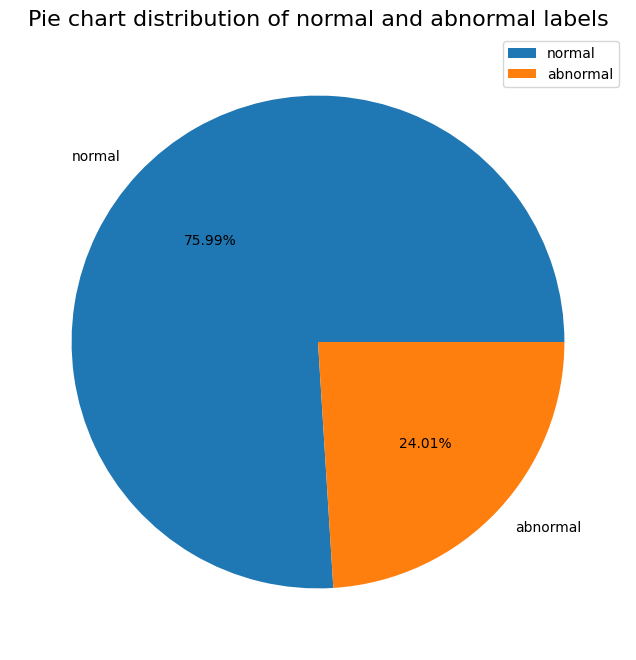

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('plots/Pie_chart_binary.png')
plt.show()

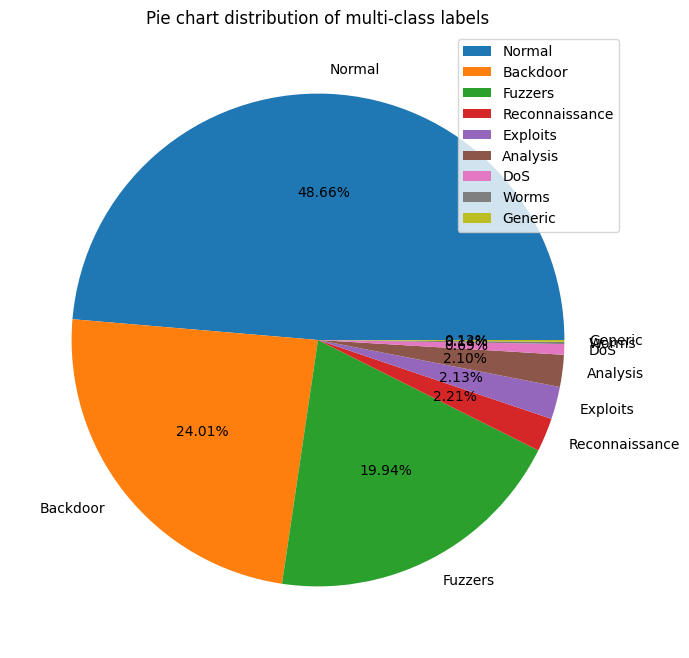

In [26]:
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.savefig('plots/Pie_chart_multi.png')
plt.show()

In [27]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
# Group the data by attack category and service, excluding normal attacks
df_attacks_cat_services = data[(data['attack_cat'] != 'normal')].groupby(['attack_cat', 'service']).size().reset_index(name='Count')

# Create a 3x3 subplot grid
fig = make_subplots(rows=3, cols=3,
                    subplot_titles=('Category: Analysis', 'Category: Backdoor', 'Category: DoS',
                                    'Category: Exploits', 'Category: Fuzzers', 'Category: Generic',
                                    'Category: Reconnaissance', 'Category: Shellcode', 'Category: Worms'))

# Create a list of attack categories to loop through
categories = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms']

# Define row and column positions for each plot
positions = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]

# Loop through the categories and create a bar plot for each one
for i, category in enumerate(categories):
    # Filter the dataframe for each attack category
    df_filtered = df_attacks_cat_services[df_attacks_cat_services['attack_cat'] == category]

    # Add bar plot to the subplot
    fig.add_trace(go.Bar(x=df_filtered['service'], y=df_filtered['Count'], name=category,
                         marker_color=px.colors.qualitative.Plotly[i]),
                  row=positions[i][0], col=positions[i][1])

# Update layout
fig.update_layout(height=900, width=900, title_text="Service Counts by Attack Categories", showlegend=False)

# Update x-axis for all subplots
fig.update_xaxes(tickangle=90)

# Show the figure
fig.show()
plt.savefig('plots/SERVICE.png')


<Figure size 640x480 with 0 Axes>

In [26]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Group the data by attack category and protocol, excluding normal attacks
df_attacks_cat_proto = data[(data['attack_cat'] != 'normal')].groupby(['attack_cat', 'proto']).size().reset_index(name='Count')

# Create a 3x3 subplot grid
fig = make_subplots(rows=3, cols=3,
                    subplot_titles=('Category: Analysis', 'Category: Backdoor', 'Category: DoS',
                                    'Category: Exploits', 'Category: Fuzzers', 'Category: Generic',
                                    'Category: Reconnaissance', 'Category: Shellcode', 'Category: Worms'))

# Create a list of attack categories to loop through
categories = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms']

# Define row and column positions for each plot
positions = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]

# Loop through the categories and create a bar plot for each one (top 5 protocols)
for i, category in enumerate(categories):
    # Filter the dataframe for each attack category and take the top 5 protocols
    df_filtered = df_attacks_cat_proto[df_attacks_cat_proto['attack_cat'] == category].nlargest(5, 'Count')

    # Add bar plot to the subplot
    fig.add_trace(go.Bar(x=df_filtered['proto'], y=df_filtered['Count'], name=category,
                         marker_color=px.colors.qualitative.Plotly[i]),
                  row=positions[i][0], col=positions[i][1])

# Update layout
fig.update_layout(height=900, width=900, title_text="Top 5 Protocols by Attack Categories", showlegend=False)

# Update x-axis for all subplots
fig.update_xaxes(tickangle=90)

# Show the figure
fig.show()


In [27]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Group the data by attack category and state, excluding normal attacks
df_attacks_cat_state = data[(data['attack_cat'] != 'normal')].groupby(['attack_cat', 'state']).size().reset_index(name='Count')

# Create a 3x3 subplot grid
fig = make_subplots(rows=3, cols=3,
                    subplot_titles=('Category: Analysis', 'Category: Backdoor', 'Category: DoS',
                                    'Category: Exploits', 'Category: Fuzzers', 'Category: Generic',
                                    'Category: Reconnaissance', 'Category: Shellcode', 'Category: Worms'))

# List of attack categories
categories = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms']

# Define the row and column positions for the plots
positions = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]

# Loop through the attack categories and create a bar plot for each one
for i, category in enumerate(categories):
    # Filter the dataframe for each attack category and take the top states
    df_filtered = df_attacks_cat_state[df_attacks_cat_state['attack_cat'] == category].nlargest(5, 'Count')

    # Add bar plot to the subplot
    fig.add_trace(go.Bar(x=df_filtered['state'], y=df_filtered['Count'], name=category,
                         marker_color=px.colors.qualitative.Plotly[i]),
                  row=positions[i][0], col=positions[i][1])

# Update the layout of the entire figure
fig.update_layout(height=900, width=900, title_text="Attack Counts by State and Category", showlegend=False)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=90)

# Show the plot
fig.show()


C:\Users\saran\AppData\Local\Temp\ipykernel_12036\487939117.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_attack_cat.index, y=top_attack_cat.values, palette='deep')


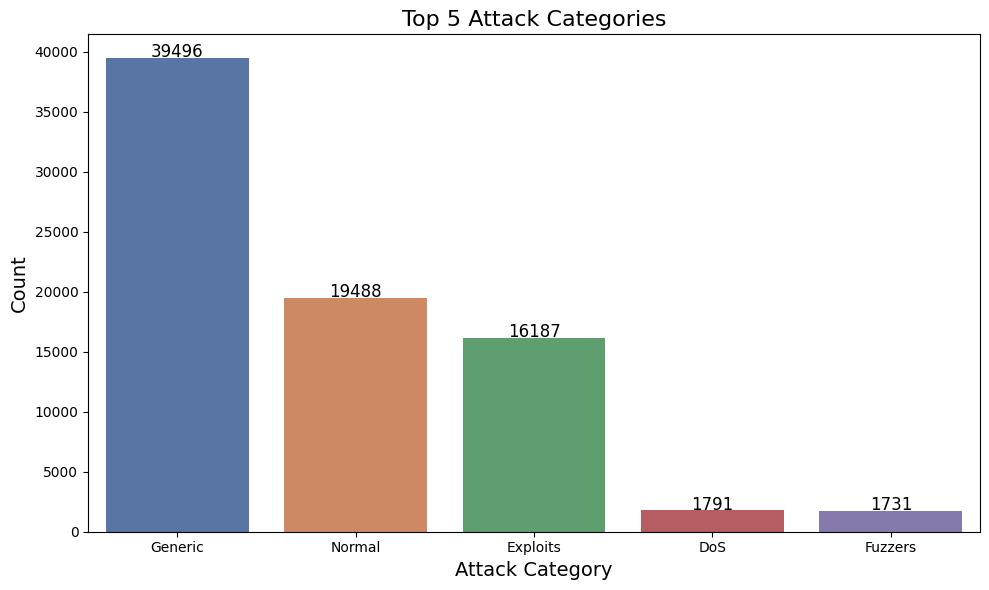

In [26]:
# 10. Barplot of top attack categories with counts
top_attack_cat = data['attack_cat'].value_counts()[:5]  # Top 5 attack categories
plt.figure(figsize=(10,6))
sns.barplot(x=top_attack_cat.index, y=top_attack_cat.values, palette='deep')

# Add annotations (numbers on top of the bars)
for i, value in enumerate(top_attack_cat.values):
    plt.text(i, value + 50, f'{value}', ha='center', fontsize=12, color='black')

plt.title('Top 5 Attack Categories', fontsize=16)
plt.xlabel('Attack Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

# Save and show plot
plt.savefig('plots/Top_5_Attack_Categories_with_Numbers.png')
plt.show()


C:\Users\saran\AppData\Local\Temp\ipykernel_12036\829900864.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_attack_cat.index, y=all_attack_cat.values, palette='deep')


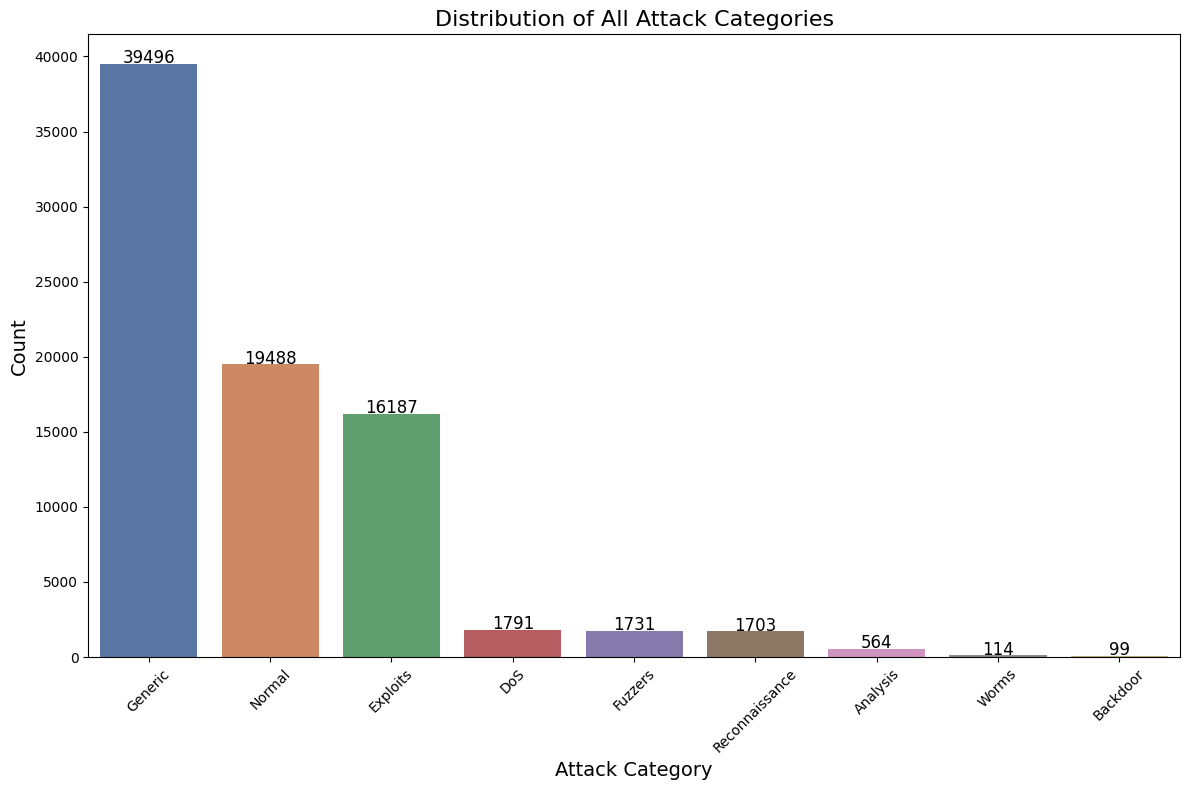

In [27]:
# Barplot of all attack categories with counts
all_attack_cat = data['attack_cat'].value_counts()  # All attack categories
plt.figure(figsize=(12,8))  # Adjust the figure size if necessary
sns.barplot(x=all_attack_cat.index, y=all_attack_cat.values, palette='deep')

# Add annotations (numbers on top of the bars)
for i, value in enumerate(all_attack_cat.values):
    plt.text(i, value + 50, f'{value}', ha='center', fontsize=12, color='black')

plt.title('Distribution of All Attack Categories', fontsize=16)
plt.xlabel('Attack Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Save and show plot
plt.savefig('plots/All_Attack_Categories_with_Numbers.png')
plt.show()


ONE HOT ENCODING

In [79]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [80]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


In [81]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [82]:
data_cat.head()

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
11,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
15,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
17,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
21,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False


In [83]:
data.shape

(81173, 45)

In [84]:
data = pd.concat([data, data_cat],axis=1)

In [85]:
data.shape

(81173, 64)

In [86]:
data.drop(columns=cat_col,inplace=True)

In [87]:
data.shape

(81173, 61)

DATA NORMALIZATION

In [88]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [89]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [90]:
# data before normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,False,False,False,False,False,False,True,False,False,False
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,False,True,False,False,False,False,True,False,False,False
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,False,False,True,False,False,False,False,True,False,False
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,False,False,False,False,False,False,True,False,False,False
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,False,False,False,False,False,False,True,False,False,False


In [91]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [92]:
# data after normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802780e-02,0.001144,0.001093,0.000041,0.000053,0.000014,0.138393,0.992126,0.000001,...,False,False,False,False,False,False,True,False,False,False
11,12,3.488529e-02,0.006344,0.002551,0.004337,0.000151,0.000043,0.138393,0.992126,0.000092,...,False,True,False,False,False,False,True,False,False,False
15,16,1.666693e-08,0.000104,0.000000,0.000003,0.000000,0.500000,0.995536,0.000000,0.119792,...,False,False,True,False,False,False,False,True,False,False
17,18,6.559354e-03,0.000936,0.000729,0.000059,0.000075,0.000043,0.138393,0.992126,0.000007,...,False,False,False,False,False,False,True,False,False,False
21,22,5.633690e-03,0.000936,0.000547,0.000069,0.000018,0.000044,0.995536,0.992126,0.000009,...,False,False,False,False,False,False,True,False,False,False


LABEL ENCODING

MULTI-CLASS LABELS

In [93]:
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [94]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [95]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [96]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

In [97]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

CORRELATION MATRIX 


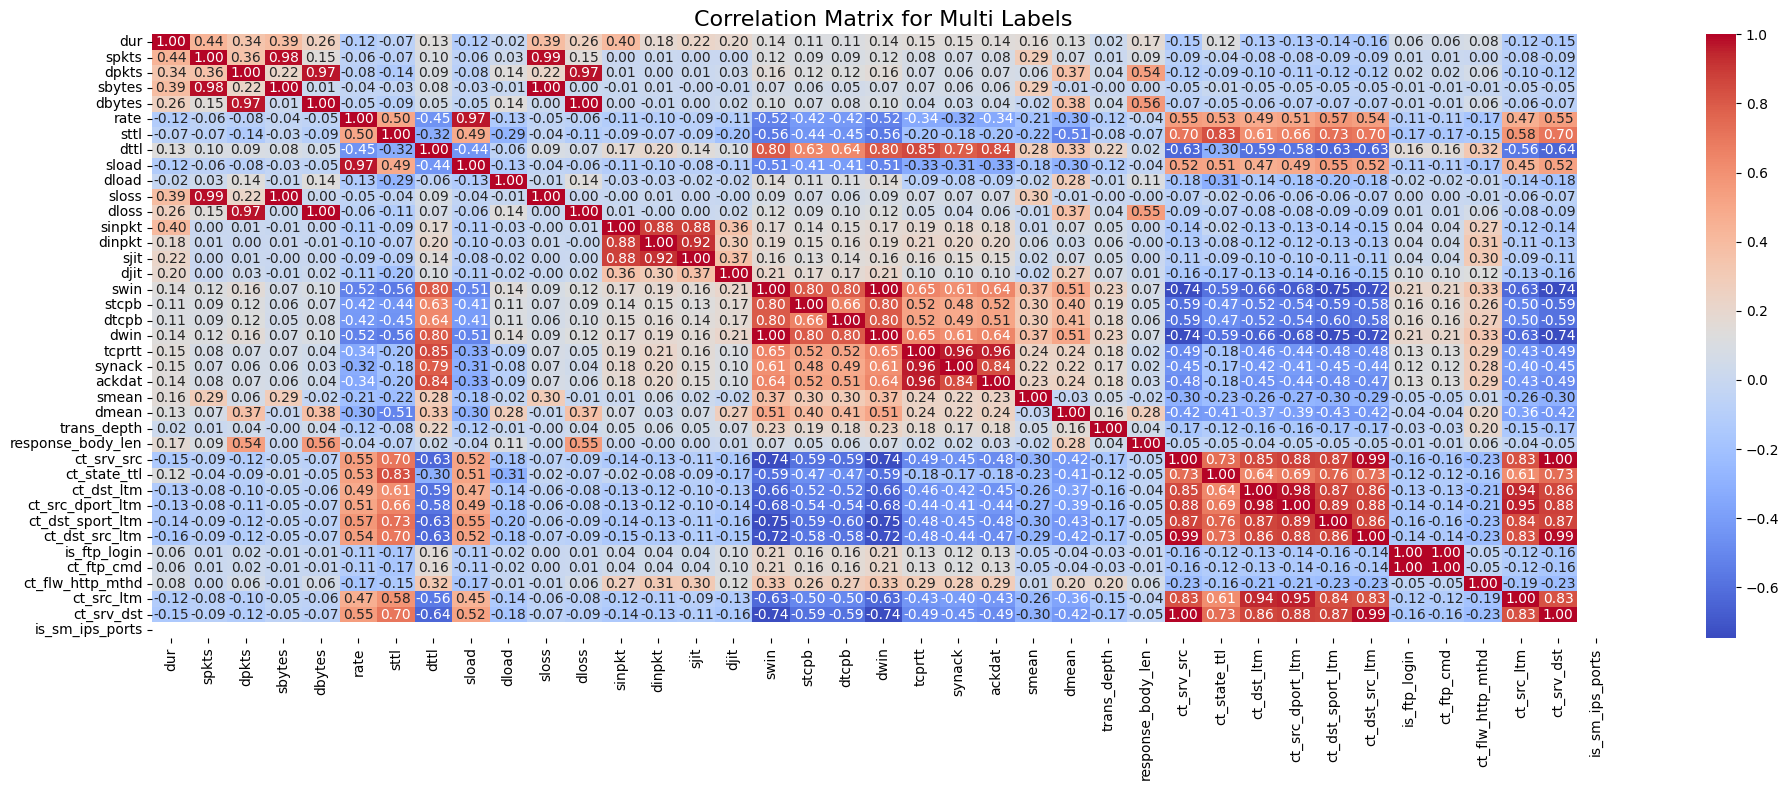

In [98]:
# Correlation Matrix for Multi-class Labels with annotations
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()

# Create heatmap with annotations
sns.heatmap(corr_multi, vmax=1.0, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

plt.title('Correlation Matrix for Multi Labels', fontsize=16)
plt.tight_layout()

# Save and display the plot
plt.savefig('plots/correlation_matrix_multi_with_labels.png')
plt.show()


In [99]:
num_col = list(multi_data.select_dtypes(include='number').columns)

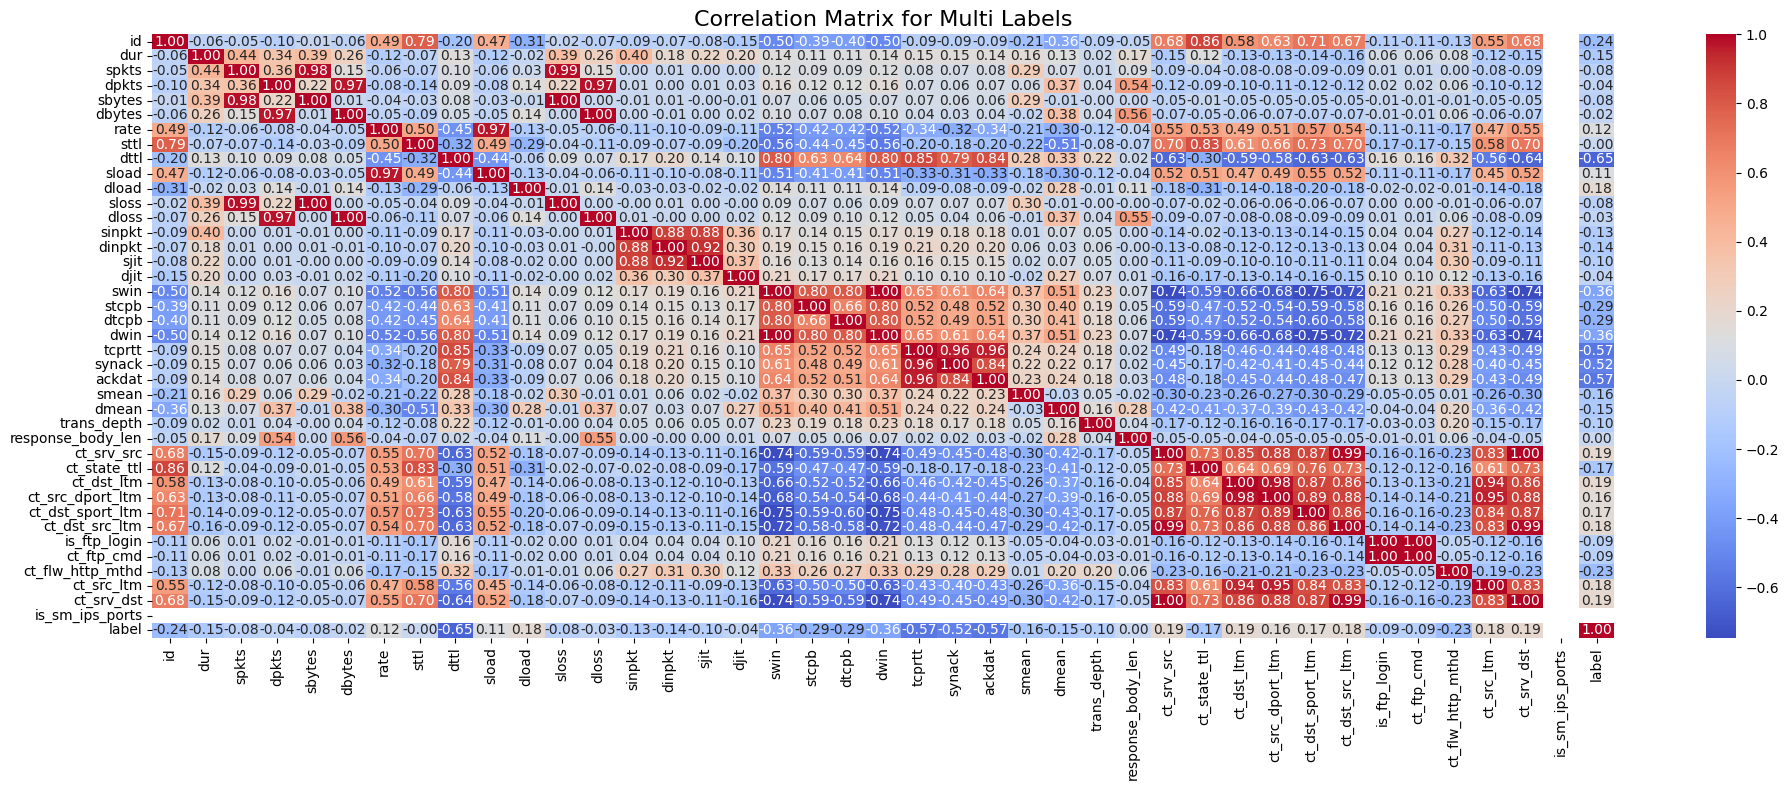

In [100]:
# Correlation Matrix for Multi-class Labels with annotations
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()

# Create heatmap with annotations
sns.heatmap(corr_multi, vmax=1.0, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

plt.title('Correlation Matrix for Multi Labels', fontsize=16)
plt.tight_layout()

# Save and display the plot
plt.savefig('plots/correlation_matrix_multi_with_labels.png')
plt.show()


FEATURE SELECTION

In [101]:
from sklearn.feature_selection import SelectKBest, chi2

X = multi_data[num_col]
y = multi_data['label']

# Create the SelectKBest object and fit it
chi2_selector = SelectKBest(chi2, k=10)
X_kbest = chi2_selector.fit_transform(X, y)

# Get the mask of selected features
selected_indices = chi2_selector.get_support(indices=True)

# Print the names of the selected features
selected_features = X.columns[selected_indices]
print("Selected features:", selected_features.tolist())


Selected features: ['id', 'sttl', 'dttl', 'swin', 'dwin', 'ct_srv_src', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_srv_dst', 'label']


In [102]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = selected_features
multi_cols

Index(['id', 'sttl', 'dttl', 'swin', 'dwin', 'ct_srv_src', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'ct_srv_dst', 'label'],
      dtype='object')

In [103]:
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()

In [104]:
multi_data.to_csv('./datasets/multi_data.csv')

Confusion Matrix:
[[  77    0    4   39    1    2    1    2    0]
 [   0    1    1   11    1    0    0    3    0]
 [   1    1   43  265   16    6    5   28    2]
 [  37   14  279 2666   60   58   16  168   11]
 [  11    0   12   62  236   10    4   18    2]
 [   3    0    2   49    5 7765    0    3    1]
 [   1    0    3   15    4    0 3838    4    0]
 [   0    1   37  189   27    7    2   73    3]
 [   0    1    3   14    6    0    0    5    0]]

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.59      0.61      0.60       126
      Backdoor       0.06      0.06      0.06        17
           DoS       0.11      0.12      0.11       367
      Exploits       0.81      0.81      0.81      3309
       Fuzzers       0.66      0.66      0.66       355
       Generic       0.99      0.99      0.99      7828
        Normal       0.99      0.99      0.99      3865
Reconnaissance       0.24      0.22      0.23       339
         Worms      

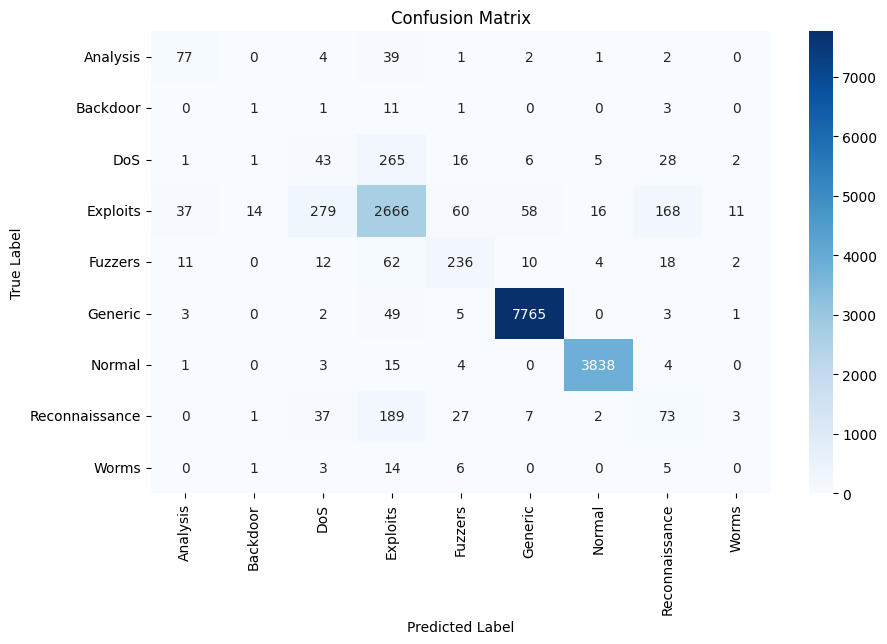

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Separate features and target variable
X = multi_data.drop(columns=['label'])  # Exclude the label column
y = multi_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nClassification Report:")
class_report = classification_report(y_test, y_pred, target_names=le2.classes_)
print(class_report)

# Calculate and print additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nAdditional Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le2.classes_, yticklabels=le2.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Confusion Matrix:
[[  74    0    4   37    5    3    0    3    0]
 [   0    1    0   12    1    0    0    3    0]
 [   1    2   41  264   15    7    6   29    2]
 [  46   14  291 2629   69   61   13  176   10]
 [  11    1   14   65  226   12    6   17    3]
 [   3    0    3   49    8 7760    0    4    1]
 [   0    0    3   17    4    0 3838    3    0]
 [   0    2   33  179   33   10    1   76    5]
 [   0    0    3   14    6    0    0    6    0]]

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.55      0.59      0.57       126
      Backdoor       0.05      0.06      0.05        17
           DoS       0.10      0.11      0.11       367
      Exploits       0.80      0.79      0.80      3309
       Fuzzers       0.62      0.64      0.63       355
       Generic       0.99      0.99      0.99      7828
        Normal       0.99      0.99      0.99      3865
Reconnaissance       0.24      0.22      0.23       339
         Worms      

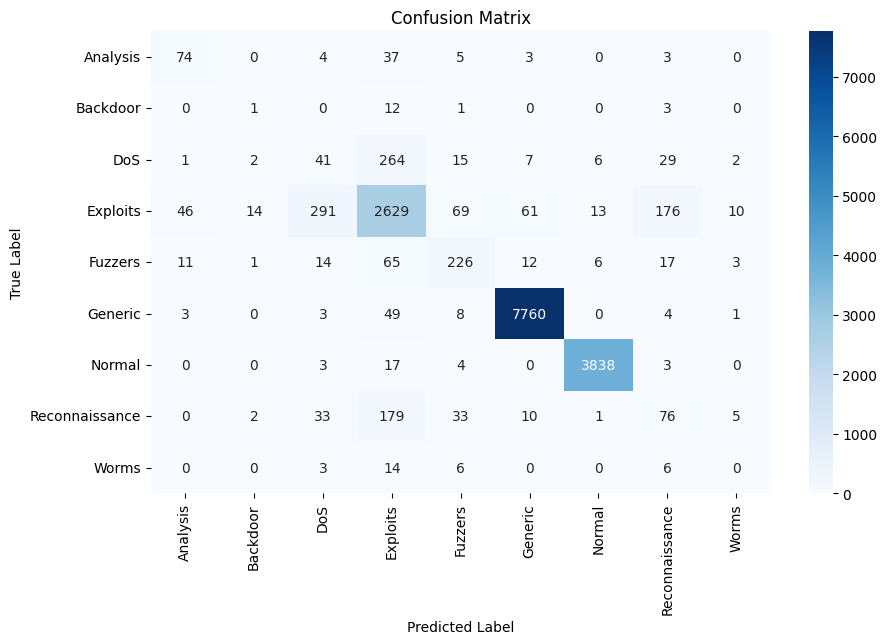

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Separate features and target variable
X = multi_data.drop(columns=['label'])  # Exclude the label column
y = multi_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nClassification Report:")
class_report = classification_report(y_test, y_pred, target_names=le2.classes_)
print(class_report)

# Calculate and print additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nAdditional Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le2.classes_, yticklabels=le2.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Confusion Matrix:
[[  15    1    2   77    2   27    1    1    0]
 [   0    0    0   13    0    4    0    0    0]
 [   1    0    9  259    6   86    5    1    0]
 [  31    0   75 2365   53  738   40    7    0]
 [   3    0   12  228   30   74    7    1    0]
 [   1    0    1   85    4 7737    0    0    0]
 [   0    0    0   46    4    0 3815    0    0]
 [   4    0    7  256    6   63    3    0    0]
 [   0    0    0   19    2    7    1    0    0]]

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.27      0.12      0.17       126
      Backdoor       0.00      0.00      0.00        17
           DoS       0.08      0.02      0.04       367
      Exploits       0.71      0.71      0.71      3309
       Fuzzers       0.28      0.08      0.13       355
       Generic       0.89      0.99      0.93      7828
        Normal       0.99      0.99      0.99      3865
Reconnaissance       0.00      0.00      0.00       339
         Worms      

C:\Users\saran\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\saran\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\saran\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\saran\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no pred

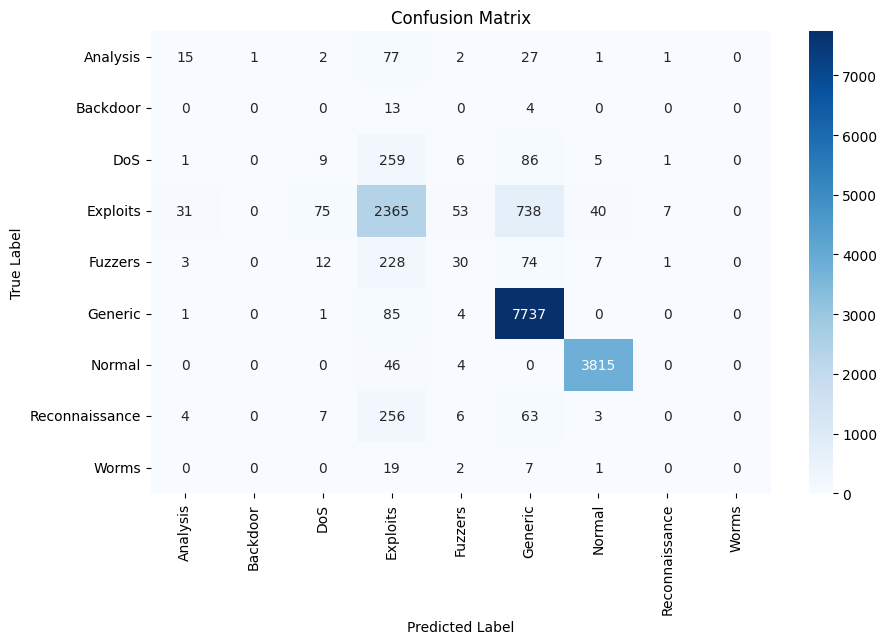

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Separate features and target variable
X = multi_data.drop(columns=['label'])  # Exclude the label column
y = multi_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier (k=5 is a common choice)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nClassification Report:")
class_report = classification_report(y_test, y_pred, target_names=le2.classes_)
print(class_report)

# Calculate and print additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nAdditional Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le2.classes_, yticklabels=le2.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Confusion Matrix:
[[  74    0    0   50    0    0    1    1    0]
 [   0    0    0   15    2    0    0    0    0]
 [   1    0   10  336    5    3    2   10    0]
 [  13    1   10 3226   34    4   10   11    0]
 [   9    0    0   89  233    7   14    3    0]
 [   3    0    0   60    0 7762    0    3    0]
 [   1    0    2   35    4    0 3822    1    0]
 [   1    0    8  304    9    2    0   15    0]
 [   0    0    0   26    2    0    0    1    0]]

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.73      0.59      0.65       126
      Backdoor       0.00      0.00      0.00        17
           DoS       0.33      0.03      0.05       367
      Exploits       0.78      0.97      0.87      3309
       Fuzzers       0.81      0.66      0.72       355
       Generic       1.00      0.99      0.99      7828
        Normal       0.99      0.99      0.99      3865
Reconnaissance       0.33      0.04      0.08       339
         Worms      

C:\Users\saran\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saran\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saran\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

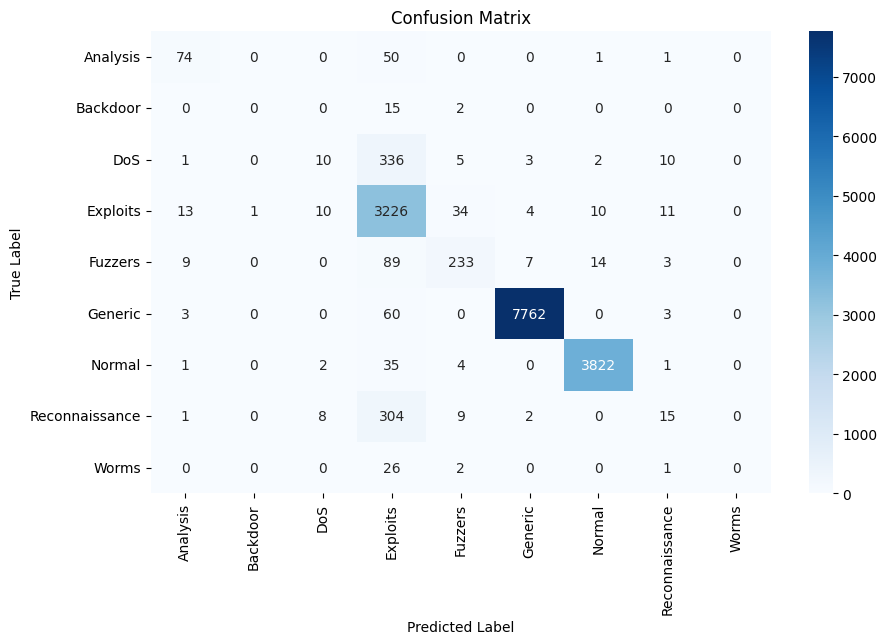

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from xgboost import XGBClassifier  # Import XGBoost

# Separate features and target variable
X = multi_data.drop(columns=['label'])  # Exclude the label column
y = multi_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
clf = XGBClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nClassification Report:")
class_report = classification_report(y_test, y_pred, target_names=le2.classes_)
print(class_report)

# Calculate and print additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nAdditional Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le2.classes_, yticklabels=le2.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [58]:
import pickle
from os import path, makedirs

pkl_filename = "./models/xgboost_model.pkl"
if (not path.isfile(pkl_filename)):
    # Create the directory if it doesn't exist
    makedirs("./models", exist_ok=True)
    
    # saving the trained model to disk 
    with open(pkl_filename, 'wb') as file:
        pickle.dump(clf, file)  # clf is your trained XGBoost model
    print("Saved model to disk")
else:
    print("Model already saved")


Model already saved


C:\Users\saran\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix:
[[   0    0    0  126    0    0    0    0    0]
 [   0    0    0   17    0    0    0    0    0]
 [   0    0    0  348   12    7    0    0    0]
 [   0    0    0 3300    1    8    0    0    0]
 [   0    0    0  300   38   17    0    0    0]
 [   0    0    0   68    7 7753    0    0    0]
 [   0    0    0  189    1    0 3675    0    0]
 [   0    0    0  320   17    2    0    0    0]
 [   0    0    0   29    0    0    0    0    0]]

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       126
      Backdoor       0.00      0.00      0.00        17
           DoS       0.00      0.00      0.00       367
      Exploits       0.70      1.00      0.82      3309
       Fuzzers       0.50      0.11      0.18       355
       Generic       1.00      0.99      0.99      7828
        Normal       1.00      0.95      0.97      3865
Reconnaissance       0.00      0.00      0.00       339
         Worms      

C:\Users\saran\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saran\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saran\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

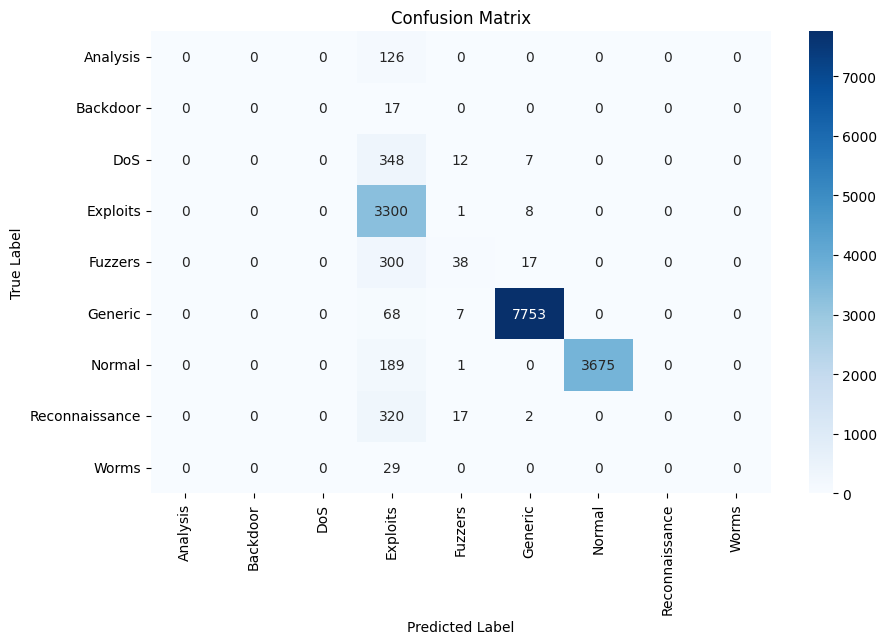

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier  # Import AdaBoost
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier  # Optional: Weak classifier for AdaBoost

# Separate features and target variable
X = multi_data.drop(columns=['label'])  # Exclude the label column
y = multi_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the AdaBoost classifier
# Optional: Set DecisionTreeClassifier as a weak learner
base_estimator = DecisionTreeClassifier(max_depth=1)  # Weak learner (default)
clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nClassification Report:")
class_report = classification_report(y_test, y_pred, target_names=le2.classes_)
print(class_report)

# Calculate and print additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nAdditional Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le2.classes_, yticklabels=le2.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


PREDICTION


In [63]:
import pandas as pd
import pickle
import numpy as np

# Load the dataset to extract feature names
print("Loading dataset...")
multi_data = pd.read_csv('datasets/multi_data.csv')
print("Dataset loaded successfully.")

# Extract feature names (excluding the target variable 'label')
feature_names = multi_data.columns[:-1].tolist()  # Assuming the last column is 'label'
print(f"Extracted feature names: {feature_names}")

# Load the trained model from the pickle file
pkl_filename = "./models/xgboost_model.pkl"
print(f"Loading model from {pkl_filename}...")
with open(pkl_filename, 'rb') as file:
    clf = pickle.load(file)
print("Model loaded successfully.")

# Predefined input data (replace with actual test data)
# Ensure this list matches the length of feature_names
# Each value in this list corresponds to a feature in the same order as feature_names
predefined_input = [0.5, 2, 1, 3, 4, 5, 6, 7, 8]  # Example values for 10 features

# Convert predefined input to a numpy array and reshape for prediction
input_data = np.array(predefined_input).reshape(1, -1)
print(f"\nInput data for prediction: {input_data}")

# Make prediction
print("Making prediction...")
prediction = clf.predict(input_data)
prediction_proba = clf.predict_proba(input_data)
print("Prediction completed.")

# Output the prediction
print(f"\nPredicted type of attack: {prediction[0]}")
print(f"Prediction probabilities: {prediction_proba}")

Loading dataset...
Dataset loaded successfully.
Extracted feature names: ['Unnamed: 0', 'id', 'sttl', 'dttl', 'swin', 'dwin', 'ct_srv_src', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_srv_dst']
Loading model from ./models/xgboost_model.pkl...
Model loaded successfully.

Input data for prediction: [[0.5 2.  1.  3.  4.  5.  6.  7.  8. ]]
Making prediction...
Prediction completed.

Predicted type of attack: 6
Prediction probabilities: [[1.14201005e-01 1.16263618e-01 1.18542737e-01 1.20839243e-01
  1.19549146e-01 5.04095473e-08 1.74288394e-01 1.19790867e-01
  1.16524940e-01]]


C:\Users\saran\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\saran\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [64]:
import pandas as pd
import pickle
import numpy as np

# Load the dataset to extract feature names
print("Loading dataset...")
multi_data = pd.read_csv('datasets/multi_data.csv')
print("Dataset loaded successfully.")

# Extract feature names (excluding the target variable 'label')
feature_names = multi_data.columns[:-1].tolist()  # Assuming the last column is 'label'
print(f"Extracted feature names: {feature_names}")

# Load the trained model from the pickle file
pkl_filename = "./models/xgboost_model.pkl"
print(f"Loading model from {pkl_filename}...")
with open(pkl_filename, 'rb') as file:
    clf = pickle.load(file)
print("Model loaded successfully.")

# Load the attack types (class labels) from le2_classes.npy with allow_pickle=True
attack_types = np.load('./le2_classes.npy', allow_pickle=True)
print("Loaded attack types (class labels) from le2_classes.npy:")
print(attack_types)

# Predefined input data (replace with actual test data)
# Ensure this list matches the length of feature_names
# Each value in this list corresponds to a feature in the same order as feature_names
predefined_input = [0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11]  # Example values for 10 features

# Convert predefined input to a numpy array and reshape for prediction
input_data = np.array(predefined_input).reshape(1, -1)
print(f"\nInput data for prediction: {input_data}")

# Make prediction
print("Making prediction...")
prediction = clf.predict(input_data)
prediction_proba = clf.predict_proba(input_data)
print("Prediction completed.")

# Map the predicted label to the corresponding attack type
predicted_attack_type = attack_types[prediction[0]]

# Output the prediction
print(f"\nPredicted type of attack: {predicted_attack_type}")
print(f"Prediction probabilities: {prediction_proba}")


Loading dataset...
Dataset loaded successfully.
Extracted feature names: ['Unnamed: 0', 'id', 'sttl', 'dttl', 'swin', 'dwin', 'ct_srv_src', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_srv_dst']
Loading model from ./models/xgboost_model.pkl...
Model loaded successfully.
Loaded attack types (class labels) from le2_classes.npy:
['Analysis' 'Backdoor' 'DoS' 'Exploits' 'Fuzzers' 'Generic' 'Normal'
 'Reconnaissance' 'Worms']

Input data for prediction: [[0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11]]
Making prediction...
Prediction completed.

Predicted type of attack: Normal
Prediction probabilities: [[1.19224377e-01 1.15429139e-01 1.19910551e-01 1.22821831e-01
  1.16165128e-01 5.07507463e-08 1.76906525e-01 1.15848975e-01
  1.13693422e-01]]


C:\Users\saran\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\saran\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [65]:
import pandas as pd
import pickle
import numpy as np

# Load the dataset to extract feature names
print("Loading dataset...")
multi_data = pd.read_csv('datasets/multi_data.csv')
print("Dataset loaded successfully.")

# Check class distribution in the dataset
class_distribution = multi_data['label'].value_counts()  # Replace 'label' with the actual label column name
print("\nClass distribution in the dataset:")
print(class_distribution)

# Extract feature names (excluding the target variable 'label')
feature_names = multi_data.columns[:-1].tolist()  # Assuming the last column is 'label'
print(f"\nExtracted feature names: {feature_names}")

# Load the trained model from the pickle file
pkl_filename = "./models/xgboost_model.pkl"
print(f"\nLoading model from {pkl_filename}...")
with open(pkl_filename, 'rb') as file:
    clf = pickle.load(file)
print("Model loaded successfully.")

# Load the attack types (class labels) from le2_classes.npy with allow_pickle=True
attack_types = np.load('./le2_classes.npy', allow_pickle=True)
print("\nLoaded attack types (class labels) from le2_classes.npy:")
print(attack_types)

# Predefined input data (replace with actual test data)
# Adjust this list to match a more realistic scenario that may predict 'Exploits'
# You can tweak these values based on feature importance or domain knowledge
predefined_input = [119469,119470,0.13839285714285712,0.9921259842519685,1.0,1.0,0.0,0.0,0.0196078431372549]  # Example values that might lead to 'Exploits'

# Convert predefined input to a numpy array and reshape for prediction
input_data = np.array(predefined_input).reshape(1, -1)
print(f"\nInput data for prediction: {input_data}")

# Make prediction
print("Making prediction...")
prediction = clf.predict(input_data)
prediction_proba = clf.predict_proba(input_data)
print("Prediction completed.")

# Map the predicted label to the corresponding attack type
predicted_attack_type = attack_types[prediction[0]]

# Output the prediction
print(f"\nPredicted type of attack: {predicted_attack_type}")
print(f"Prediction probabilities: {prediction_proba}")

# Debugging: Output the probabilities for all categories
for i, prob in enumerate(prediction_proba[0]):
    print(f"Class '{attack_types[i]}' - Probability: {prob}")

# Check if the predicted attack type is 'Exploits'
if predicted_attack_type == 'Exploits':
    print("\nSuccess: The predicted attack type is 'Exploits'.")
else:
    print(f"\nThe predicted attack type is '{predicted_attack_type}', not 'Exploits'.")
    print("Try tweaking the input data to improve prediction accuracy.")


Loading dataset...
Dataset loaded successfully.

Class distribution in the dataset:
label
5    39496
6    19488
3    16187
2     1791
4     1731
7     1703
0      564
8      114
1       99
Name: count, dtype: int64

Extracted feature names: ['Unnamed: 0', 'id', 'sttl', 'dttl', 'swin', 'dwin', 'ct_srv_src', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_srv_dst']

Loading model from ./models/xgboost_model.pkl...
Model loaded successfully.

Loaded attack types (class labels) from le2_classes.npy:
['Analysis' 'Backdoor' 'DoS' 'Exploits' 'Fuzzers' 'Generic' 'Normal'
 'Reconnaissance' 'Worms']

Input data for prediction: [[1.19469000e+05 1.19470000e+05 1.38392857e-01 9.92125984e-01
  1.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  1.96078431e-02]]
Making prediction...
Prediction completed.

Predicted type of attack: Exploits
Prediction probabilities: [[1.21315098e-01 1.24671708e-01 1.27071796e-01 1.29438516e-01
  1.27772284e-01 1.18153517e-01 4.74682976e-08 1.27746124e-01
  1.23830

C:\Users\saran\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\saran\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [66]:
import numpy as np

# Load the attack types (class labels) from le2_classes.npy
attack_types = np.load('./le2_classes.npy', allow_pickle=True)

# Create a dictionary mapping label numbers to attack types
label_to_attack_type = {i: attack_types[i] for i in range(len(attack_types))}

# Print the mapping
print("Label to Attack Type Mapping:")
for label, attack_type in label_to_attack_type.items():
    print(f"Label {label}: {attack_type}")


Label to Attack Type Mapping:
Label 0: Analysis
Label 1: Backdoor
Label 2: DoS
Label 3: Exploits
Label 4: Fuzzers
Label 5: Generic
Label 6: Normal
Label 7: Reconnaissance
Label 8: Worms


In [67]:
import pandas as pd
import pickle
import numpy as np

# Load the dataset to extract feature names
print("Loading dataset...")
multi_data = pd.read_csv('datasets/multi_data.csv')
print("Dataset loaded successfully.")

# Check class distribution in the dataset
class_distribution = multi_data['label'].value_counts()  # Replace 'label' with the actual label column name
print("\nClass distribution in the dataset:")
print(class_distribution)

# Extract feature names (excluding the target variable 'label')
feature_names = multi_data.columns[:-1].tolist()  # Assuming the last column is 'label'
print(f"\nExtracted feature names: {feature_names}")

# Load the trained model from the pickle file
pkl_filename = "./models/xgboost_model.pkl"
print(f"\nLoading model from {pkl_filename}...")
with open(pkl_filename, 'rb') as file:
    clf = pickle.load(file)
print("Model loaded successfully.")

# Load the attack types (class labels) from le2_classes.npy with allow_pickle=True
attack_types = np.load('./le2_classes.npy', allow_pickle=True)
print("\nLoaded attack types (class labels) from le2_classes.npy:")
print(attack_types)

# Predefined input data (replace with actual test data)
predefined_input = [120954,0.9955357142857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0]  # Example values

# Convert predefined input to a numpy array and reshape for prediction
input_data = np.array(predefined_input).reshape(1, -1)
print(f"\nInput data for prediction: {input_data}")

# Make prediction
print("Making prediction...")
prediction = clf.predict(input_data)
prediction_proba = clf.predict_proba(input_data)
print("Prediction completed.")

# Map the predicted label to the corresponding attack type
predicted_label = prediction[0]  # Numeric label
predicted_attack_type = attack_types[predicted_label]  # Attack type

# Output the prediction
print(f"\nPredicted label: {predicted_label}")
print(f"Predicted type of attack: {predicted_attack_type}")
print(f"Prediction probabilities: {prediction_proba}")

# Print the attack types with their corresponding probabilities
print("\nAttack types and their corresponding probabilities:")
for i, attack_type in enumerate(attack_types):
    print(f"Attack Type: '{attack_type}' - Probability: {prediction_proba[0][i]}")

# Indicate the predicted attack type at the end for clarity
print(f"\nFinal Prediction: The predicted type of attack is '{predicted_attack_type}' with label {predicted_label}.")


Loading dataset...
Dataset loaded successfully.

Class distribution in the dataset:
label
5    39496
6    19488
3    16187
2     1791
4     1731
7     1703
0      564
8      114
1       99
Name: count, dtype: int64

Extracted feature names: ['Unnamed: 0', 'id', 'sttl', 'dttl', 'swin', 'dwin', 'ct_srv_src', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_srv_dst']

Loading model from ./models/xgboost_model.pkl...
Model loaded successfully.

Loaded attack types (class labels) from le2_classes.npy:
['Analysis' 'Backdoor' 'DoS' 'Exploits' 'Fuzzers' 'Generic' 'Normal'
 'Reconnaissance' 'Worms']

Input data for prediction: [[1.20954000e+05 9.95535714e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]
Making prediction...
Prediction completed.

Predicted label: 5
Predicted type of attack: Generic
Prediction probabilities: [[1.76785917e-09 1.84746971e-09 4.58885649e-07 4.58003846e-07
  4.64757855e-07 9.99998156e-01 1.36267916e-13 4.5669

C:\Users\saran\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\saran\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
